<a href="https://colab.research.google.com/github/HansHenseler/masdav2022/blob/main/Part_6_Exercises_Answers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analyzing and visualising emails

Part 6

Master of Advanced Studies in Digital Forensics & Cyber Investigation

Data Analytics and Visualization for Digital Forensics

(c) Hans Henseler, 2022

# Part 6

## 1 Importing python libs

In [ ]:
from __future__ import print_function
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.colors import LogNorm, Normalize
pd.__version__

'1.3.5'

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## 2 Read the Excel file containing Enron headers

Let's read the excel file containing headers of Enron emails

In [ ]:
df = pd.read_excel( "/content/gdrive/MyDrive/Testdata/EnronEmails.xlsx" )

In [ ]:
df

,DocID,From,Recipients,Cc,Date,Subject,CustodianName,Location,Day
0,175231,m..presto@enron.com<m..presto@enron.com>,tim.belden@enron.com <tim.belden@enron.com>,NaN,2001-10-16 21:28:28,Son Onofre,presto-k,sent_items,1749
1,232669,magdelena.cruz@enron.com<magdelena.cruz@enron....,e.taylor@enron.com <e.taylor@enron.com>,NaN,2001-07-12 18:23:41,FW: DB# User Feedback,taylor-m,inbox\passwords,1653
2,178812,becky.pitre@enron.com<becky.pitre@enron.com>,richard.ring@enron.com <richard.ring@enron.com>,NaN,2001-10-23 22:26:39,FW: Termination Proceedings,ring-r,inbox,1756
3,5834,eric.bass@enron.com<eric.bass@enron.com>,shanna.husser@enron.com <shanna.husser@enron.c...,NaN,2000-08-07 13:51:00,Austin?,bass-e,_sent_mail,1314
4,187302,cara.semperger@enron.com<cara.semperger@enron....,shift.portland@enron.com <shift.portland@enron...,NaN,2001-06-23 01:05:41,IDAHO HAS A NEW NERC ACRONYM,salisbury-h,inbox,1634
...,...,...,...,...,...,...,...,...,...
252960,4869,joanne.rozycki@enron.com<joanne.rozycki@enron....,susan.bailey@enron.com <susan.bailey@enron.com>,NaN,2002-01-24 17:06:32,Gerald Nemec is out of office thru Monday,bailey-s,deleted_items,1849
252961,215514,matt.smith@enron.com<matt.smith@enron.com>,asalazar@pirnie.com <asalazar@pirnie.com>,NaN,2001-02-28 17:08:00,RE:,smith-m,_sent_mail,1519
252962,219842,d..steffes@enron.com<d..steffes@enron.com>,c..williams@enron.com <c..williams@enron.com>;...,wanda.curry@enron.com <wanda.curry@enron.com>;...,2001-10-10 23:18:22,RE: SCE Late Charges,steffes-j,sent_items,1743
252963,10820,sally.beck@enron.com<sally.beck@enron.com>,bob.hall@enron.com <bob.hall@enron.com>,NaN,2001-01-17 09:21:00,Re: Good Morning.,beck-s,_sent_mail,1477


In [ ]:
df.shape

(252965, 9)

## 2 Replace missing values

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252965 entries, 0 to 252964
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   DocID          252965 non-null  int64         
 1   From           252965 non-null  object        
 2   Recipients     243682 non-null  object        
 3   Cc             59630 non-null   object        
 4   Date           252965 non-null  datetime64[ns]
 5   Subject        244260 non-null  object        
 6   CustodianName  252965 non-null  object        
 7   Location       252957 non-null  object        
 8   Day            252965 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 17.4+ MB


We have values that are Null. Let's replace these with empty string

In [ ]:
df.fillna("")

,DocID,From,Recipients,Cc,Date,Subject,CustodianName,Location,Day
0,175231,m..presto@enron.com<m..presto@enron.com>,tim.belden@enron.com <tim.belden@enron.com>,,2001-10-16 21:28:28,Son Onofre,presto-k,sent_items,1749
1,232669,magdelena.cruz@enron.com<magdelena.cruz@enron....,e.taylor@enron.com <e.taylor@enron.com>,,2001-07-12 18:23:41,FW: DB# User Feedback,taylor-m,inbox\passwords,1653
2,178812,becky.pitre@enron.com<becky.pitre@enron.com>,richard.ring@enron.com <richard.ring@enron.com>,,2001-10-23 22:26:39,FW: Termination Proceedings,ring-r,inbox,1756
3,5834,eric.bass@enron.com<eric.bass@enron.com>,shanna.husser@enron.com <shanna.husser@enron.c...,,2000-08-07 13:51:00,Austin?,bass-e,_sent_mail,1314
4,187302,cara.semperger@enron.com<cara.semperger@enron....,shift.portland@enron.com <shift.portland@enron...,,2001-06-23 01:05:41,IDAHO HAS A NEW NERC ACRONYM,salisbury-h,inbox,1634
...,...,...,...,...,...,...,...,...,...
252960,4869,joanne.rozycki@enron.com<joanne.rozycki@enron....,susan.bailey@enron.com <susan.bailey@enron.com>,,2002-01-24 17:06:32,Gerald Nemec is out of office thru Monday,bailey-s,deleted_items,1849
252961,215514,matt.smith@enron.com<matt.smith@enron.com>,asalazar@pirnie.com <asalazar@pirnie.com>,,2001-02-28 17:08:00,RE:,smith-m,_sent_mail,1519
252962,219842,d..steffes@enron.com<d..steffes@enron.com>,c..williams@enron.com <c..williams@enron.com>;...,wanda.curry@enron.com <wanda.curry@enron.com>;...,2001-10-10 23:18:22,RE: SCE Late Charges,steffes-j,sent_items,1743
252963,10820,sally.beck@enron.com<sally.beck@enron.com>,bob.hall@enron.com <bob.hall@enron.com>,,2001-01-17 09:21:00,Re: Good Morning.,beck-s,_sent_mail,1477


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252965 entries, 0 to 252964
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   DocID          252965 non-null  int64         
 1   From           252965 non-null  object        
 2   Recipients     243682 non-null  object        
 3   Cc             59630 non-null   object        
 4   Date           252965 non-null  datetime64[ns]
 5   Subject        244260 non-null  object        
 6   CustodianName  252965 non-null  object        
 7   Location       252957 non-null  object        
 8   Day            252965 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 17.4+ MB


## 3 List custodians and number of emails per custodian

Example: how many emails for custodian beck-s?

In [ ]:
df[df.CustodianName=="beck-s"].shape[0]

4833

In [ ]:
custodians = pd.DataFrame(df['CustodianName'].value_counts()).rename(columns={"CustodianName": "Count"})
custodians

,Count
dasovich-j,15776
kaminski-v,11228
jones-t,10148
shackleton-s,9236
mann-k,7461
...,...
slinger-r,121
solberg-g,87
south-s,57
phanis-s,26


## 4 Filter email subjects on keyword

Select all emails that have the word blockbuster or enron in the subject

In [ ]:
df[df['Subject'].str.contains("[bB]lockbuster|[eE]nron",na=False)].shape[0]

11473

## 5 Create a timeline of email count between 1-1-1999 and 1-1-2002

Create a histogram showing the number of emails per week 

In [ ]:
# Use the Date column as index

df.set_index(['Date'],inplace=True)
df.index
df

,DocID,From,Recipients,Cc,Subject,CustodianName,Location,Day,Count
Date,,,,,,,,,
2001-10-16 21:28:28,175231,m..presto@enron.com<m..presto@enron.com>,tim.belden@enron.com <tim.belden@enron.com>,NaN,Son Onofre,presto-k,sent_items,1749,1
2001-07-12 18:23:41,232669,magdelena.cruz@enron.com<magdelena.cruz@enron....,e.taylor@enron.com <e.taylor@enron.com>,NaN,FW: DB# User Feedback,taylor-m,inbox\passwords,1653,1
2001-10-23 22:26:39,178812,becky.pitre@enron.com<becky.pitre@enron.com>,richard.ring@enron.com <richard.ring@enron.com>,NaN,FW: Termination Proceedings,ring-r,inbox,1756,1
2000-08-07 13:51:00,5834,eric.bass@enron.com<eric.bass@enron.com>,shanna.husser@enron.com <shanna.husser@enron.c...,NaN,Austin?,bass-e,_sent_mail,1314,1
2001-06-23 01:05:41,187302,cara.semperger@enron.com<cara.semperger@enron....,shift.portland@enron.com <shift.portland@enron...,NaN,IDAHO HAS A NEW NERC ACRONYM,salisbury-h,inbox,1634,1
...,...,...,...,...,...,...,...,...,...
2002-01-24 17:06:32,4869,joanne.rozycki@enron.com<joanne.rozycki@enron....,susan.bailey@enron.com <susan.bailey@enron.com>,NaN,Gerald Nemec is out of office thru Monday,bailey-s,deleted_items,1849,1
2001-02-28 17:08:00,215514,matt.smith@enron.com<matt.smith@enron.com>,asalazar@pirnie.com <asalazar@pirnie.com>,NaN,RE:,smith-m,_sent_mail,1519,1
2001-10-10 23:18:22,219842,d..steffes@enron.com<d..steffes@enron.com>,c..williams@enron.com <c..williams@enron.com>;...,wanda.curry@enron.com <wanda.curry@enron.com>;...,RE: SCE Late Charges,steffes-j,sent_items,1743,1


In [ ]:
import datetime



# we clean up the dates and leave out anything before 1-1-1999 or after 1-1-2002

clean_df = df[(df.index.date > datetime.date(1999,1,1)) & (df.index.date < datetime.date(2002,1,1))]

emails_per_day = pd.pivot_table( clean_df , values="Count",index=[clean_df.index.date], aggfunc="count")
emails_per_day

,Count
1999-01-04,2
1999-01-05,3
1999-01-06,3
1999-01-07,3
1999-01-08,4
...,...
2001-12-27,531
2001-12-28,507
2001-12-29,186
2001-12-30,131


Let's plot this selection

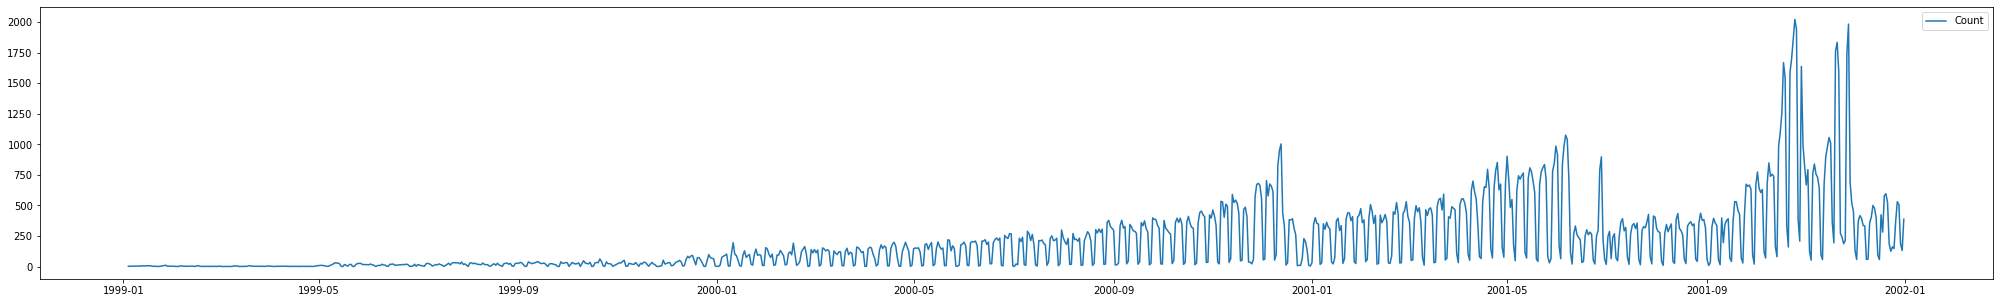

In [ ]:
emails_per_day.plot(kind='line',y='Count',figsize=(35,5))

## 6 Network visualisation

In [ ]:
import networkx as nx


# note that your file doesn't have column names
# passing `names` to label the columns

relations = pd.read_excel('/content/gdrive/MyDrive/Testdata/Relations.xlsx')
relations



,From,To_Cc,CountOfDocId
0,1,1,2
1,1,2,33
2,1,26,5
3,1,28,8
4,1,29,15
...,...,...,...
357044,84618,13581,1
357045,84619,27426,1
357046,84621,581,1
357047,84622,581,1


In [ ]:
addresses = pd.read_excel('/content/gdrive/MyDrive/Testdata/Addresses.xlsx')
addresses

,AddressId,Count,Address,CustodianID
0,1,2185,m..presto@enron.com,NaN
1,2,3446,tim.belden@enron.com,NaN
2,3,41,magdelena.cruz@enron.com,NaN
3,4,585,e.taylor@enron.com,NaN
4,5,76,becky.pitre@enron.com,NaN
...,...,...,...,...
84624,84625,1,sellers'.'prentice@enron.com,NaN
84625,84626,1,sue_nord@enron.enron.net,NaN
84626,84627,1,ceg_ir-sec.um.a.2.105072@joinmail.ccbn.com,NaN
84627,84628,1,lmlovett@swidlaw.com,NaN


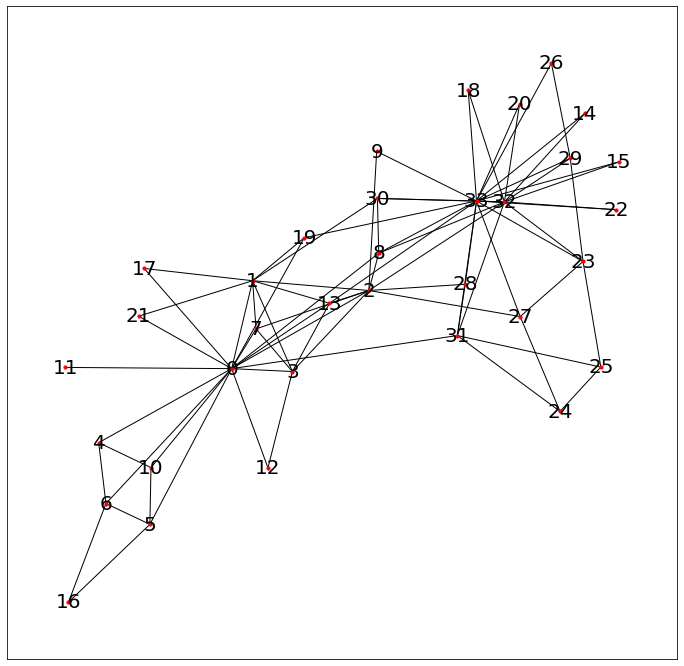

In [ ]:
# networkx has some sample datasets available. Here is the Karate Club dataset:
# see http://vlado.fmf.uni-lj.si/pub/networks/data/Ucinet/UciData.htm#zachary

plt.figure(figsize=(12,12)) 
Gk = nx.karate_club_graph()
nx.draw_networkx(Gk,node_size=10,node_color='red',with_labels=True, font_size=20)
plt.show()


In [ ]:
# Let's try on our email data
# See https://networkx.org/documentation/stable/reference/convert.html
# only take a selection otherwise drawing will take too long

G = nx.from_pandas_edgelist(relations[357000:357048], source='From', target='To_Cc')


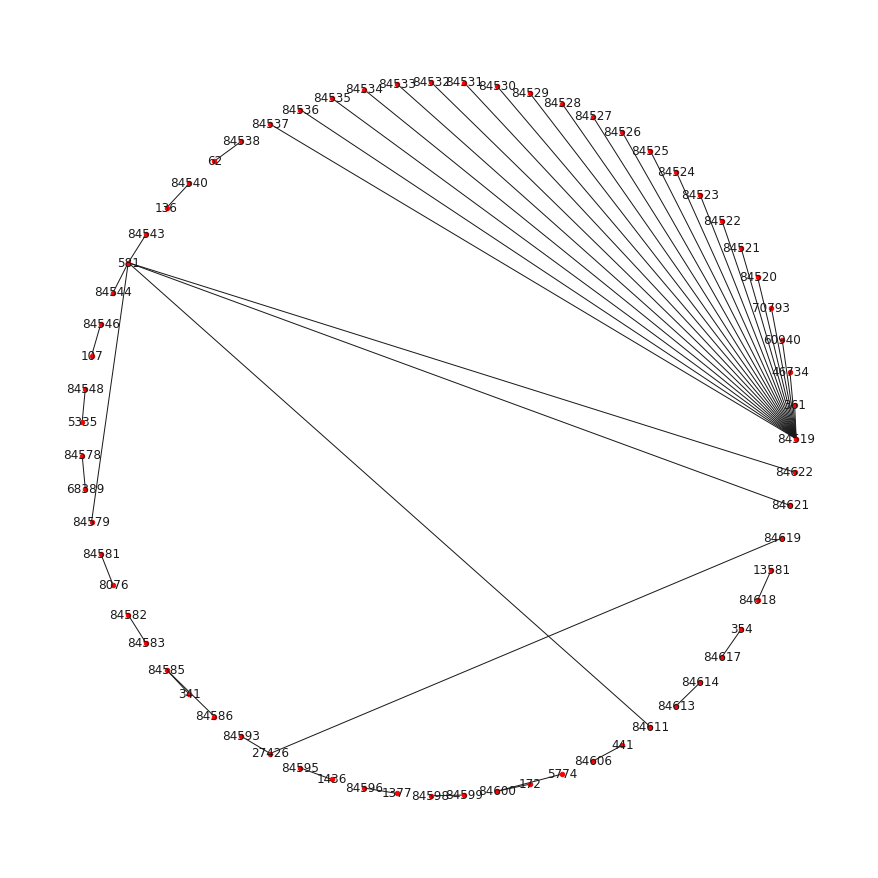

In [ ]:
plt.figure(figsize=(12,12)) 
#nx.draw_spring(G,node_size=20,node_color='red',with_labels=True,font_size=9)
nx.draw_circular(G,node_size=20,node_color='red',with_labels=True,font_size=12)
plt.show()

In [ ]:
# Centrality measures

degree = nx.algorithms.centrality.degree_centrality(Gk)

def top10(list):
    i = 0
    for w in sorted(list, key=list.get, reverse=True):
        print(w,'\t',degree[w])
        i+=1
        if i==10:
          break

top10(degree)


33 	 0.5151515151515151
0 	 0.48484848484848486
32 	 0.36363636363636365
2 	 0.30303030303030304
1 	 0.2727272727272727
3 	 0.18181818181818182
31 	 0.18181818181818182
8 	 0.15151515151515152
13 	 0.15151515151515152
23 	 0.15151515151515152


In [ ]:
betweenness = nx.algorithms.centrality.betweenness_centrality(Gk)
top10(betweenness)

0 	 0.48484848484848486
33 	 0.5151515151515151
32 	 0.36363636363636365
2 	 0.30303030303030304
31 	 0.18181818181818182
8 	 0.15151515151515152
1 	 0.2727272727272727
13 	 0.15151515151515152
19 	 0.09090909090909091
5 	 0.12121212121212122


In [ ]:
eigenvector = nx.algorithms.centrality.eigenvector_centrality(Gk)
top10(eigenvector)

33 	 0.5151515151515151
0 	 0.48484848484848486
2 	 0.30303030303030304
32 	 0.36363636363636365
1 	 0.2727272727272727
8 	 0.15151515151515152
13 	 0.15151515151515152
3 	 0.18181818181818182
31 	 0.18181818181818182
30 	 0.12121212121212122


In [ ]:
closeness = nx.algorithms.centrality.closeness_centrality(Gk)
top10(closeness)

0 	 0.48484848484848486
2 	 0.30303030303030304
33 	 0.5151515151515151
31 	 0.18181818181818182
8 	 0.15151515151515152
13 	 0.15151515151515152
32 	 0.36363636363636365
19 	 0.09090909090909091
1 	 0.2727272727272727
3 	 0.18181818181818182


# Exercises

## 1 Heatmap showing number of emails per custodian per day from 1-1-1999 to 1-1-2002

In [ ]:
emails_per_custodian_day = pd.pivot_table( clean_df , columns=[clean_df.CustodianName],index=[clean_df.index.date], aggfunc="count")
emails_per_custodian_day.fillna(0,inplace=True)
emails_per_custodian_day

Cc                                                       \
CustodianName allen-p arnold-j arora-h badeer-r bailey-s bass-e baughman-d   
1999-01-04        0.0      0.0     0.0      0.0      0.0    0.0        0.0   
1999-01-05        0.0      0.0     0.0      0.0      0.0    0.0        0.0   
1999-01-06        0.0      0.0     0.0      0.0      0.0    0.0        0.0   
1999-01-07        0.0      0.0     0.0      0.0      0.0    0.0        0.0   
1999-01-08        0.0      0.0     0.0      0.0      0.0    0.0        0.0   
...               ...      ...     ...      ...      ...    ...        ...   
2001-12-27        1.0      1.0     1.0      0.0      0.0    0.0        1.0   
2001-12-28        0.0      0.0     0.0      0.0      0.0    0.0        0.0   
2001-12-29        0.0      0.0     0.0      0.0      0.0    0.0        0.0   
2001-12-30        1.0      0.0     0.0      0.0      0.0    0.0        0.0   
2001-12-31        1.0      0.0     1.0      0.0      0.0    1.0        0.0   

                                       ...   Subject                    \
CustodianName beck-s benson-r blair-l  ... whalley-g whalley-l white-s   
1999-01-04       0.0      0.0     0.0  ...       0.0       0.0     0.0   
1999-01-05       0.0      0.0     0.0  ...       0.0       0.0     0.0   
1999-01-06       0.0      0.0     0.0  ...       0.0       0.0     0.0   
1999-01-07       0.0      0.0     0.0  ...       0.0       0.0     0.0   
1999-01-08       0.0      0.0     0.0  ...       0.0       0.0     0.0   
...              ...      ...     ...  ...       ...       ...     ...   
2001-12-27       1.0      0.0    13.0  ...       0.0       0.0    11.0   
2001-12-28       1.0      0.0     8.0  ...       0.0       0.0    11.0   
2001-12-29       0.0      0.0     1.0  ...       0.0       0.0     5.0   
2001-12-30       0.0      0.0     0.0  ...       0.0       0.0     1.0   
2001-12-31       3.0      0.0    17.0  ...       0.0       0.0     7.0   

                                                                        \
CustodianName whitt-m williams-j williams-w3 wolfe-j ybarbo-p zipper-a   
1999-01-04        0.0        0.0         0.0     0.0      0.0      0.0   
1999-01-05        0.0        0.0         0.0     0.0      0.0      0.0   
1999-01-06        0.0        0.0         0.0     0.0      0.0      0.0   
1999-01-07        0.0        0.0         0.0     0.0      0.0      0.0   
1999-01-08        0.0        0.0         0.0     0.0      0.0      0.0   
...               ...        ...         ...     ...      ...      ...   
2001-12-27        2.0        0.0        25.0     0.0      0.0      0.0   
2001-12-28        3.0        0.0        24.0     0.0      0.0      4.0   
2001-12-29        0.0        0.0        24.0     0.0      0.0      0.0   
2001-12-30        0.0        0.0        24.0     0.0      0.0      0.0   
2001-12-31        0.0        0.0        23.0     0.0      0.0      3.0   

                          
CustodianName zufferli-j  
1999-01-04           0.0  
1999-01-05           0.0  
1999-01-06           0.0  
1999-01-07           0.0  
1999-01-08           0.0  
...                  ...  
2001-12-27           0.0  
2001-12-28           0.0  
2001-12-29           0.0  
2001-12-30           0.0  
2001-12-31           0.0  

[1018 rows x 1192 columns]

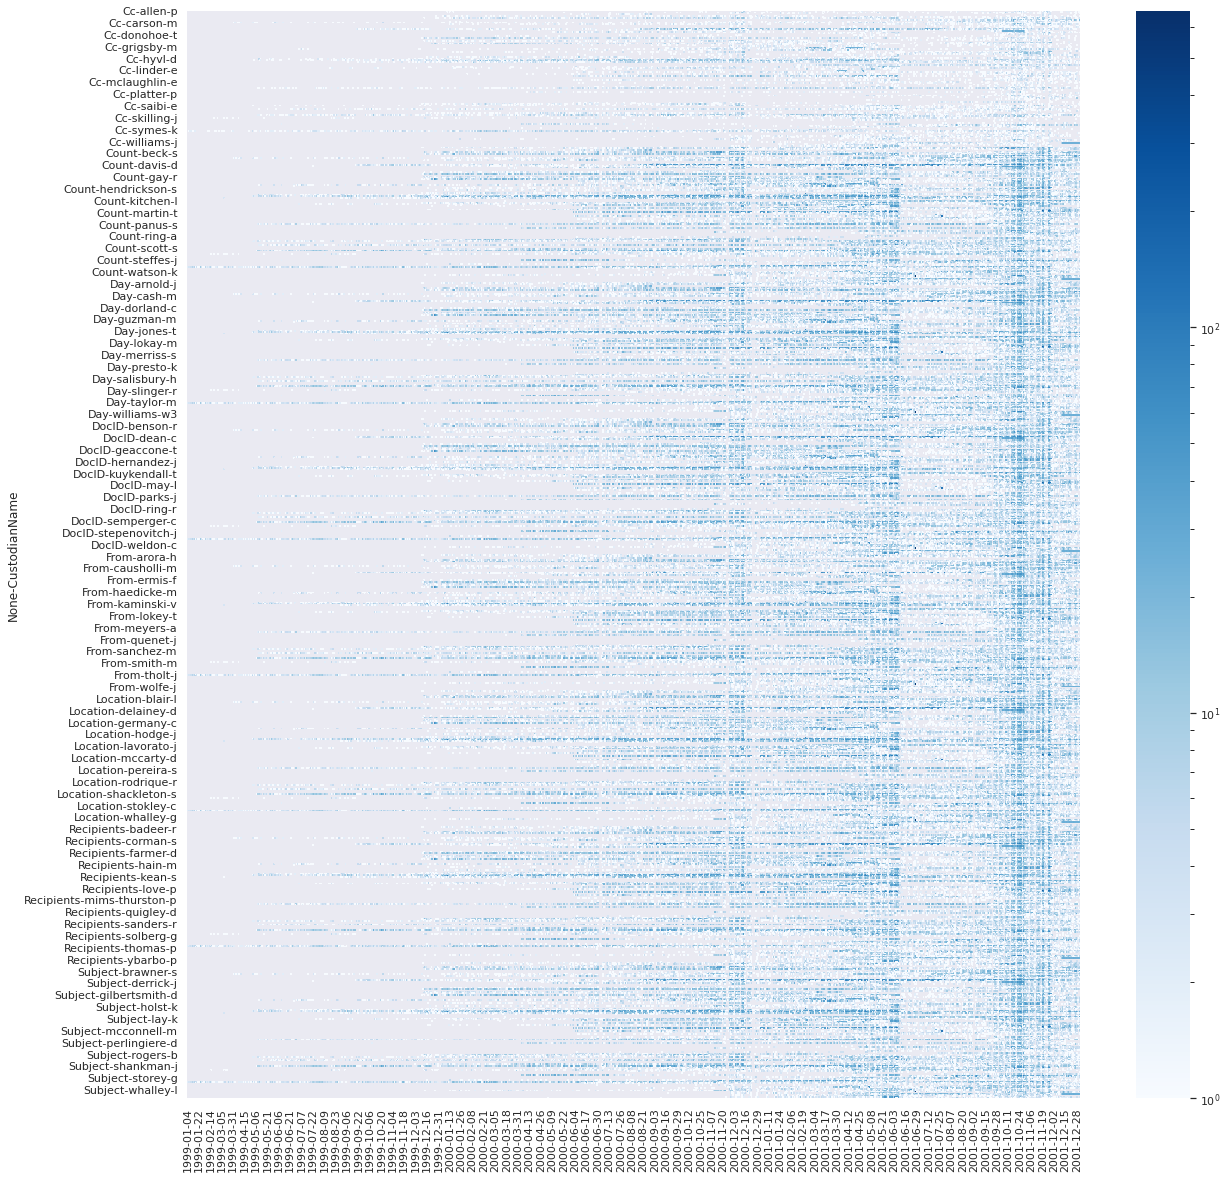

In [ ]:
import seaborn as sns

sns.set(rc = {'figure.figsize':(20,20)})
sns.heatmap(emails_per_custodian_day.transpose(), cmap="Blues",norm=LogNorm())


## 2 Create a treemap based on CustodianName and using number of emails per custodian as Size

In [ ]:
custodians = pd.DataFrame(clean_df['CustodianName'].value_counts()).rename(columns={"CustodianName": "Count"})
custodians

,Count
dasovich-j,15752
kaminski-v,10316
jones-t,10141
shackleton-s,8427
mann-k,7435
...,...
solberg-g,64
south-s,57
motley-m,49
phanis-s,26


In [ ]:
!pip install --upgrade plotly

import plotly.express as px

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 15.2 MB 7.5 MB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 5.5.0
    Uninstalling plotly-5.5.0:
      Successfully uninstalled plotly-5.5.0


In [ ]:
fig = px.treemap(custodians, path=[custodians.index],values='Count')
fig.show()

## 3 What is the most likely email address of a custodian?

In [ ]:
# let's take the custodian with the most emails: dasovich-j
#
df[df.CustodianName=='dasovich-j' ]

,DocID,From,Recipients,Cc,Subject,CustodianName,Location,Day,Count
Date,,,,,,,,,
2001-09-24 20:21:24,42711,lgoldseth@svmg.org<lgoldseth@svmg.org>,lgoldseth@svmg.org <lgoldseth@svmg.org>,NaN,CAISO NOTICE: San Francisco Study Group Member...,dasovich-j,deleted_items,1727,1
2001-01-09 19:14:00,34885,steven@iepa.com<steven@iepa.com>,wfhall2@duke-energy.com <wfhall2@duke-energy.c...,NaN,Fw: R.94-04-031/I.94-04-032: Comments of the I...,dasovich-j,all_documents,1469,1
2001-05-16 12:06:00,39130,harry.kingerski@enron.com<harry.kingerski@enro...,marty.sunde@enron.com <marty.sunde@enron.com>;...,james.steffes@enron.com <james.steffes@enron.c...,CPUC decision on 3 cent rate increase for PG&E...,dasovich-j,all_documents,1596,1
2001-03-21 17:52:00,36877,katherine.benedict@enron.com<katherine.benedic...,ca.list@enron.com <ca.list@enron.com>,NaN,Reminder - Weekly California Meeting,dasovich-j,all_documents,1540,1
2001-06-26 16:48:00,40458,lgoldseth@svmg.org<lgoldseth@svmg.org>,lgoldseth@svmg.org <lgoldseth@svmg.org>,NaN,"ENERGY UPDATE - June 26, 2001",dasovich-j,all_documents,1637,1
...,...,...,...,...,...,...,...,...,...
2001-09-24 21:10:02,44362,jeff.dasovich@enron.com<jeff.dasovich@enron.com>,paul.kaufman@enron.com <paul.kaufman@enron.com>,NaN,RE:,dasovich-j,sent_items,1727,1
2001-10-18 21:24:46,41657,cameron@perfect.com<cameron@perfect.com>,sellers'.'prentice@enron.com <sellers'.'prenti...,scottwl@hotmail.com <scottwl@hotmail.com>,RE: honduras,dasovich-j,deleted_items,1751,1
2000-12-08 16:16:00,34083,donald_lassere@enron.net<donald_lassere@enron....,scott.bolton@enron.com <scott.bolton@enron.com...,NaN,12/11 Conference Call,dasovich-j,all_documents,1437,1


In [ ]:
# select only emails that are in sent_items folder (=Location)

df[(df.CustodianName=='dasovich-j') & (df.Location.str.contains('sent_items')) ]

,DocID,From,Recipients,Cc,Subject,CustodianName,Location,Day,Count
Date,,,,,,,,,
2001-10-15 18:35:07,44703,jeff.dasovich@enron.com<jeff.dasovich@enron.com>,d..steffes@enron.com <d..steffes@enron.com>,NaN,RE: CA question on PX Credit,dasovich-j,sent_items,1748,1
2001-10-17 17:53:14,44749,jeff.dasovich@enron.com<jeff.dasovich@enron.com>,stephanie.miller@enron.com <stephanie.miller@e...,NaN,Capacity Rights Under Possible Extension of PG...,dasovich-j,sent_items,1750,1
2001-10-16 01:52:22,44726,jeff.dasovich@enron.com<jeff.dasovich@enron.com>,scottwl@hotmail.com <scottwl@hotmail.com>,NaN,RE:,dasovich-j,sent_items,1749,1
2001-11-21 00:09:51,45390,jeff.dasovich@enron.com<jeff.dasovich@enron.com>,ek@a-klaw.com <ek@a-klaw.com>,NaN,Woods Contract Whim,dasovich-j,sent_items,1785,1
2001-09-17 19:25:06,44208,jeff.dasovich@enron.com<jeff.dasovich@enron.com>,linda.robertson@enron.com <linda.robertson@enr...,NaN,RE:,dasovich-j,sent_items,1720,1
...,...,...,...,...,...,...,...,...,...
2001-07-03 09:59:00,44946,jeff.dasovich@enron.com<jeff.dasovich@enron.com>,james.steffes@enron.com <james.steffes@enron.com>,NaN,Re: Language on bonds,dasovich-j,sent_items,1644,1
2001-10-01 20:28:38,44511,jeff.dasovich@enron.com<jeff.dasovich@enron.com>,psellers@pacbell.net <psellers@pacbell.net>,NaN,FW: Google wants adwords coordinator,dasovich-j,sent_items,1734,1
2001-10-25 23:13:32,44903,jeff.dasovich@enron.com<jeff.dasovich@enron.com>,brad.richter@enron.com <brad.richter@enron.com>,NaN,RE: Meeting with Perfect,dasovich-j,sent_items,1758,1


In [ ]:
# take the From column and count values
#
df[(df.CustodianName=='dasovich-j') & (df.Location.str.contains('sent_items')) ]['From'].value_counts()


jeff.dasovich@enron.com<jeff.dasovich@enron.com>    1402
Name: From, dtype: int64

In [ ]:
# Just one value which occurs 1402 times: jeff.dasovich@enron.com<jeff.dasovich@enron.com> 
# that must be the email address from Jeff Dasovich

## 4 Create a wordcloud for email subject field contents for custodian beck-s

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# select emails from custodian beck-s
df[df.CustodianName=='beck-s']['Subject']


Date
2001-04-12 06:12:00               Space Planning - Product Control Group
2000-09-05 12:28:00                                   Schedule C Reserve
2000-09-26 17:24:00                           Your approval is requested
2001-02-23 09:56:00                RE: Commodity Logic Strategy Overview
2001-02-06 18:57:00               Sally's Itinerary for Calgary 2/7-8/01
                                             ...                        
2001-03-09 19:35:00               Operations Contacts - Week of March 12
2002-01-17 13:38:20    \\spr1inf1\sapfiles\ifout\04000\20020117-DENWC...
2000-06-02 18:40:00                                       What I'm up to
2000-10-10 11:35:00                          Re: September Status Report
2001-01-17 09:21:00                                    Re: Good Morning.
Name: Subject, Length: 4833, dtype: object

In [ ]:
# iterate through all rows and put all subjects in a single text string

text = ''
for val in df[df.CustodianName=='beck-s']['Subject']:
  text = '%s %s' % (text,val)
print(text)

 Space Planning - Product Control Group Schedule C Reserve Your approval is requested RE: Commodity Logic Strategy Overview Sally's Itinerary for Calgary 2/7-8/01 Commodity Logic Request ENA Personnel Changes Re: Congratulations Global Markets Monitor 16 Mar 01 MTM Recon Re: Afternoon - 2/2/01 EOL Activity LTD AEP-HPL update nan Helsinki 1-URGENT - Outlook Email Notification (new) Summer Interns gas risk Confirm Central Cost Savings Meeting Re: Barcelona Outsourcing Services Today's 5:00 Update Meeting - 11/20/01 FW: VNG Source Code and documentation Thanksgiving reporting (US Holiday) Sally's itinerary 1/2/01 Re: Trading Support Operations - London Weekly Report- 10-14 July Powerpoint Presentation HPL Status MG Middle Office Integration : Weekly Newsletter Additional Senior Director HR Updates FW: A/R & A/P Reconciliation Audit Notification Wellesley Presentation participant revisions Draft  - Offsite in April 4-9.ppt Re: Trading v Origination Offices RE: Industrial Markets Re: PRC Me

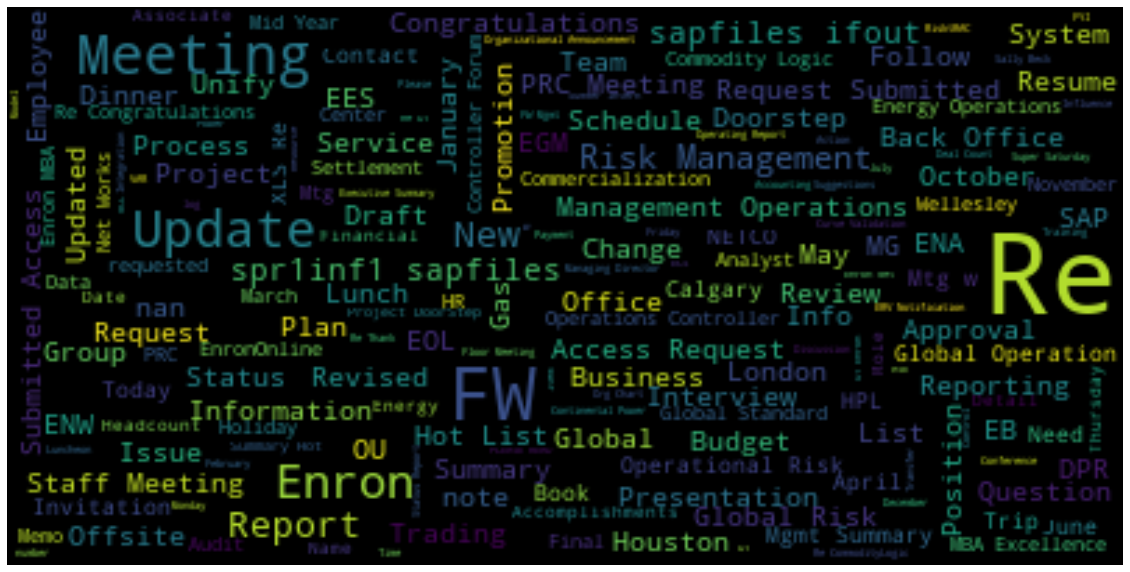

In [ ]:
wordcloud = WordCloud(max_font_size=40,stopwords=STOPWORDS).generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## 5 Filter all rows where subject contains Azurix and display heatmap as in 1

In [ ]:
azurix = clean_df[clean_df['Subject'].str.contains("[Aa]zurix",na=False)]
azurix

,DocID,From,Recipients,Cc,Subject,CustodianName,Location,Day,Count
Date,,,,,,,,,
2000-02-24 18:00:00,213210,sherri.reinartz@enron.com<sherri.reinartz@enro...,michael.anderson@enron.com <michael.anderson@e...,NaN,Re: Azurix Investment Banking Meeting,skilling-j,_sent_mail,1149,1
2001-04-26 17:26:00,86996,stanley.horton@enron.com<stanley.horton@enron....,enron@eott.com <enron@eott.com>,NaN,Re: Azurix/Enel,horton-s,_sent_mail,1576,1
2000-12-13 16:58:00,49326,karen.denne@enron.com<karen.denne@enron.com>,kenneth.lay@enron.com <kenneth.lay@enron.com>;...,mark.palmer@enron.com <mark.palmer@enron.com>,Azurix Release,derrick-j,all_documents,1442,1
2001-10-03 20:19:47,63764,tracy.geaccone@enron.com<tracy.geaccone@enron....,cindy.stark@enron.com <cindy.stark@enron.com>,NaN,FW: Azurix 2002 Plan Review,geaccone-t,sent_items,1736,1
2001-11-12 20:14:12,63077,j..parrish@enron.com<j..parrish@enron.com>,tracy.geaccone@enron.com <tracy.geaccone@enron...,NaN,RE: Azurix CE,geaccone-t,deleted_items,1776,1
...,...,...,...,...,...,...,...,...,...
2001-05-22 21:41:21,81780,40enron@enron.com<40enron@enron.com>,rod.hayslett@enron.com <rod.hayslett@enron.com>,NaN,Azurix/AWT Current Estimate,hayslett-r,projects\azurix,1602,1
2001-10-01 17:07:26,63741,tracy.geaccone@enron.com<tracy.geaccone@enron....,michael.anderson@enron.com <michael.anderson@e...,NaN,Azurix 2002 Plan Review,geaccone-t,sent_items,1734,1
2001-10-02 23:56:54,63409,cindy.stark@enron.com<cindy.stark@enron.com>,tracy.geaccone@enron.com <tracy.geaccone@enron...,NaN,RE: Azurix 2002 Plan Review,geaccone-t,inbox,1735,1


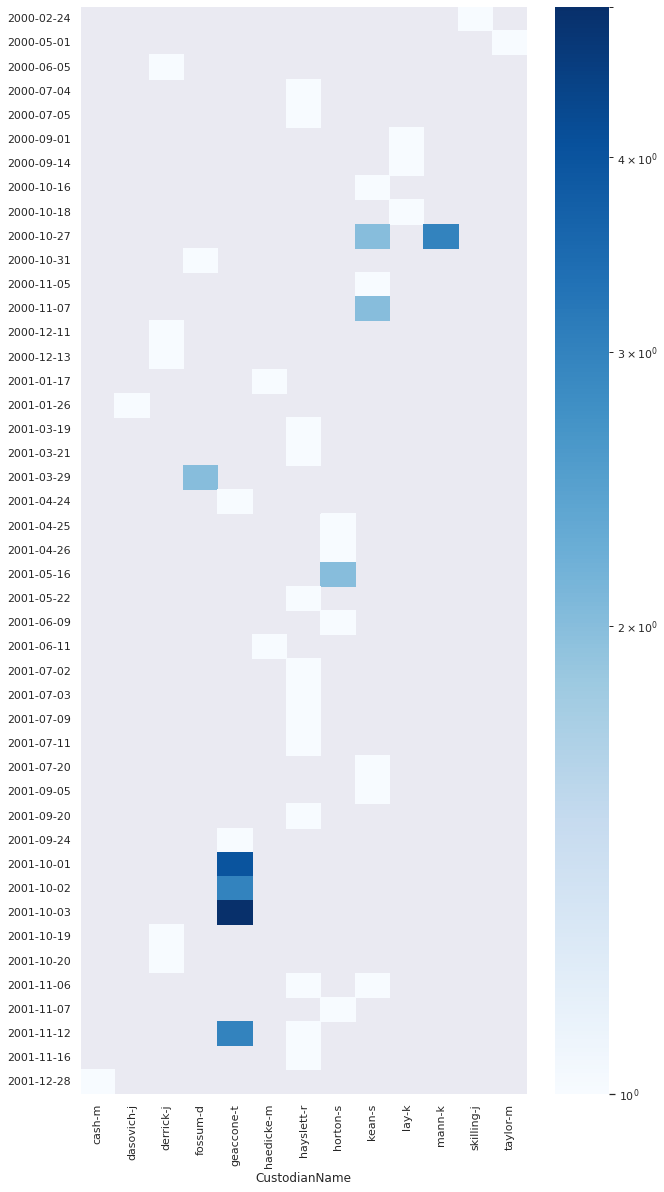

In [ ]:
azurix_per_custodian_day = pd.pivot_table( azurix , values="Count",columns=[azurix.CustodianName],index=[azurix.index.date], aggfunc="count")
azurix_per_custodian_day.fillna(0,inplace=True)
sns.set(rc = {'figure.figsize':(10,20)})
sns.heatmap(azurix_per_custodian_day, cmap="Blues",norm=LogNorm())


In [ ]:
azurix_per_custodian_day

CustodianName,cash-m,dasovich-j,derrick-j,fossum-d,geaccone-t,haedicke-m,hayslett-r,horton-s,kean-s,lay-k,mann-k,skilling-j,taylor-m
2000-02-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2000-05-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2000-06-05,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2000-07-04,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2000-07-05,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2000-09-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2000-09-14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2000-10-16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2000-10-18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2000-10-27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,3.0,0.0,0.0


In [ ]:
# note: dates are missing on the x-axis. Solve this by creating a new dataframe that has all days
# between 1-1-1997 and 1-1-2002 and then join it with the azurix data frame before plotting


df = pd.DataFrame()
df['Date'] = pd.date_range(start='1-1-2001',end='1-1-2002',freq='D')
df['Date'] = pd.to_datetime(df['Date'])
df['Count'] = 0.1
df['CustodianName'] = "Ignore"
df.set_index('Date')
df2 = azurix.reset_index().append(df)
df2=df2.set_index('Date')
df2

,DocID,From,Recipients,Cc,Subject,CustodianName,Location,Day,Count
Date,,,,,,,,,
2000-02-24 18:00:00,213210.0,sherri.reinartz@enron.com<sherri.reinartz@enro...,michael.anderson@enron.com <michael.anderson@e...,NaN,Re: Azurix Investment Banking Meeting,skilling-j,_sent_mail,1149.0,1.0
2001-04-26 17:26:00,86996.0,stanley.horton@enron.com<stanley.horton@enron....,enron@eott.com <enron@eott.com>,NaN,Re: Azurix/Enel,horton-s,_sent_mail,1576.0,1.0
2000-12-13 16:58:00,49326.0,karen.denne@enron.com<karen.denne@enron.com>,kenneth.lay@enron.com <kenneth.lay@enron.com>;...,mark.palmer@enron.com <mark.palmer@enron.com>,Azurix Release,derrick-j,all_documents,1442.0,1.0
2001-10-03 20:19:47,63764.0,tracy.geaccone@enron.com<tracy.geaccone@enron....,cindy.stark@enron.com <cindy.stark@enron.com>,NaN,FW: Azurix 2002 Plan Review,geaccone-t,sent_items,1736.0,1.0
2001-11-12 20:14:12,63077.0,j..parrish@enron.com<j..parrish@enron.com>,tracy.geaccone@enron.com <tracy.geaccone@enron...,NaN,RE: Azurix CE,geaccone-t,deleted_items,1776.0,1.0
...,...,...,...,...,...,...,...,...,...
2001-12-28 00:00:00,NaN,NaN,NaN,NaN,NaN,Ignore,NaN,NaN,0.1
2001-12-29 00:00:00,NaN,NaN,NaN,NaN,NaN,Ignore,NaN,NaN,0.1
2001-12-30 00:00:00,NaN,NaN,NaN,NaN,NaN,Ignore,NaN,NaN,0.1


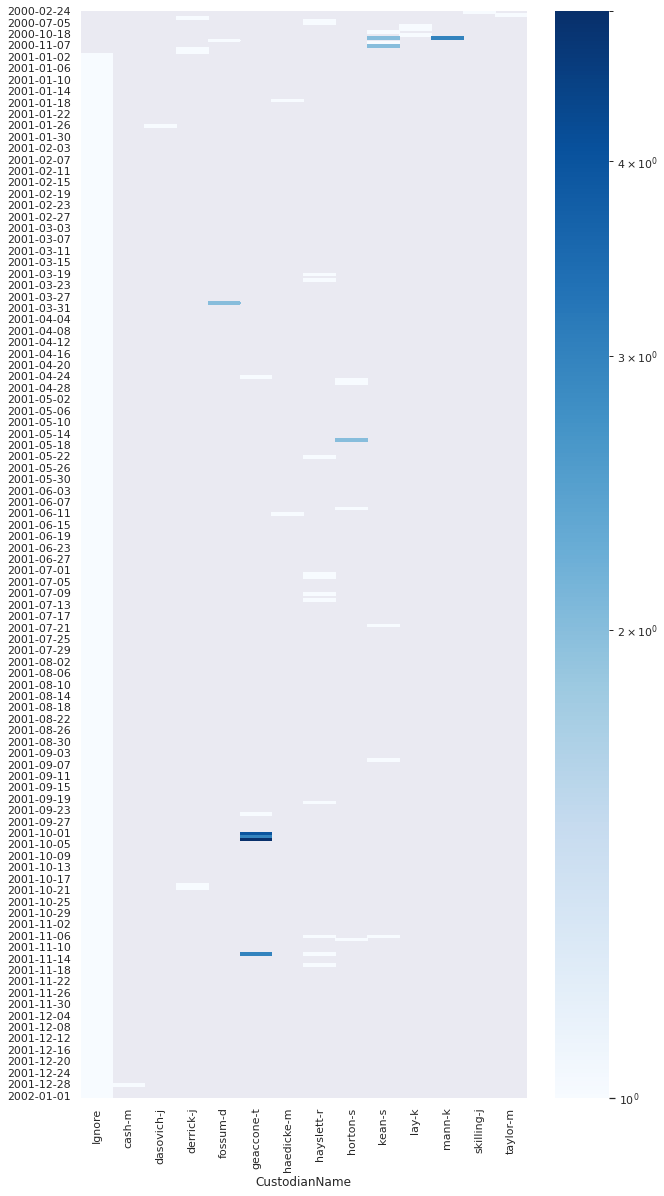

In [ ]:
df2_per_custodian_day = pd.pivot_table( df2 , values="Count",columns=[df2.CustodianName],index=[df2.index.date], aggfunc="count")
df2_per_custodian_day.fillna(0,inplace=True)
sns.heatmap(df2_per_custodian_day, cmap="Blues",norm=LogNorm())

## 6 With filtered set from exercise 5 plot a histogram for %  of emails per year-week

In [ ]:
emails_per_day = pd.pivot_table( clean_df , values="Count",index=[clean_df.index.year.rename('Year'), clean_df.index.weekofyear.rename('Week')], aggfunc="count")
emails_per_day


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)



Count
Year Week       
1999 1        15
     2        22
     3        14
     4        14
     5        12
...          ...
2001 48     5576
     49     1971
     50     2290
     51     2716
     52     2035

[156 rows x 1 columns]

In [ ]:

azurix_df = clean_df[clean_df['Subject'].str.contains("azurix",na=False, case=False)]
azurix_emails_per_day = pd.pivot_table( azurix_df , values="Count", index=[azurix_df.index.year.rename('Year'), azurix_df.index.weekofyear.rename('Week')], aggfunc="count")
azurix_emails_per_day


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning:

weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)



Count
Year Week       
2000 8         1
     18        1
     23        1
     27        2
     35        1
     37        1
     42        2
     43        5
     44        3
     45        2
     50        2
2001 3         1
     4         1
     10        1
     12        2
     13        2
     17        3
     20        2
     21        1
     23        1
     24        1
     27        2
     28        2
     29        1
     36        1
     38        1
     39        1
     40       12
     42        2
     45        3
     46        5
     52        1

In [ ]:

mdf=emails_per_day.merge(azurix_emails_per_day, on=['Year','Week'], how='left')
mdf

mdf1=mdf.fillna(0)
mdf1

mdf1['Percentage'] = (mdf1['Count_y'] / mdf1['Count_x'] * 100)
mdf1


Count_x  Count_y  Percentage
Year Week                              
1999 1          15      0.0     0.00000
     2          22      0.0     0.00000
     3          14      0.0     0.00000
     4          14      0.0     0.00000
     5          12      0.0     0.00000
...            ...      ...         ...
2001 48       5576      0.0     0.00000
     49       1971      0.0     0.00000
     50       2290      0.0     0.00000
     51       2716      0.0     0.00000
     52       2035      1.0     0.04914

[156 rows x 3 columns]

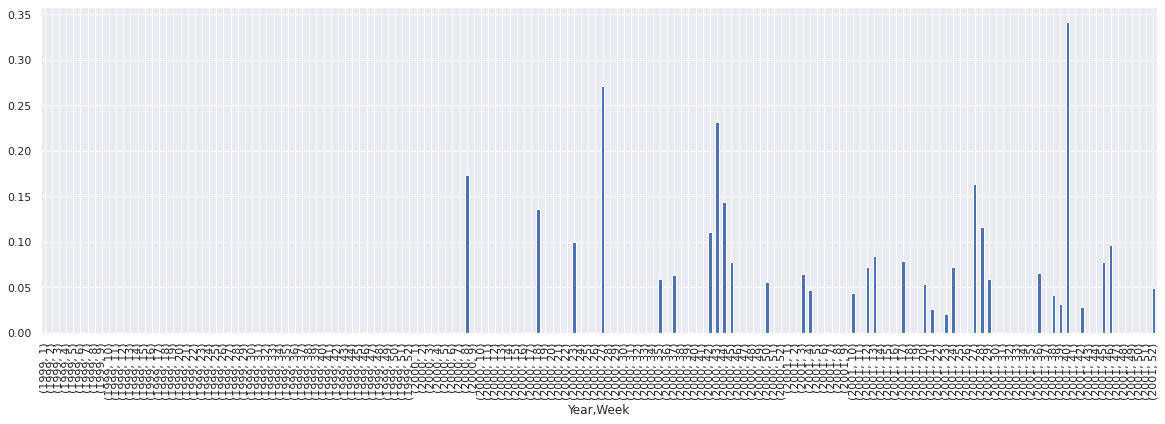

In [ ]:

ax = mdf1['Percentage'].plot.bar(rot=90,figsize=(20, 6))

## 7 **Advanced** Select a subset of addresses 

So that you get a connected graph that can be displayed in Colab with labels in a readable way

Calculate centrality and visually validate if it is (approximately) correct

In [ ]:
# In the published paper there is Table 1 with hub's and authorities in the network.
# Here is the table with id's of the addresses in the last column
#
# Address	                    Type	        Id
# sue.nord@enron.com	        Hub	          3896
# henry.means@enron.com       Hub	          5145
# angela.wilson@enron.com     Hub	          3990
# sharonda.stephens@enron.com Hub/Authority	3940
# ann.schmidt@enron.com       Hub/Authority	3188
# jeff.dasovich@enron.com     Authority     7005
# steven.kean@enron.com       Authority      192
# karen.denne@enron.com       Authority      202
#
# let's select rows from the relations[] df that only have one of these id's
#
table1_persons = relations[(\
           (relations.From==3896) |\
           (relations.From==5145) |\
           (relations.From==3990) |\
           (relations.From==3940) |\
           (relations.From==3188) |\
           (relations.From==7005) |\
           (relations.From==192) |\
           (relations.From==202) )\
          &\
          ((relations.To_Cc==3896) |\
           (relations.To_Cc==5145) |\
           (relations.To_Cc==3990) |\
           (relations.To_Cc==3940) |\
           (relations.To_Cc==3188) |\
           (relations.To_Cc==7005) |\
           (relations.To_Cc==192) |\
           (relations.To_Cc==202)\
           )]

G1 = nx.from_pandas_edgelist(table1_persons, source='From', target='To_Cc')

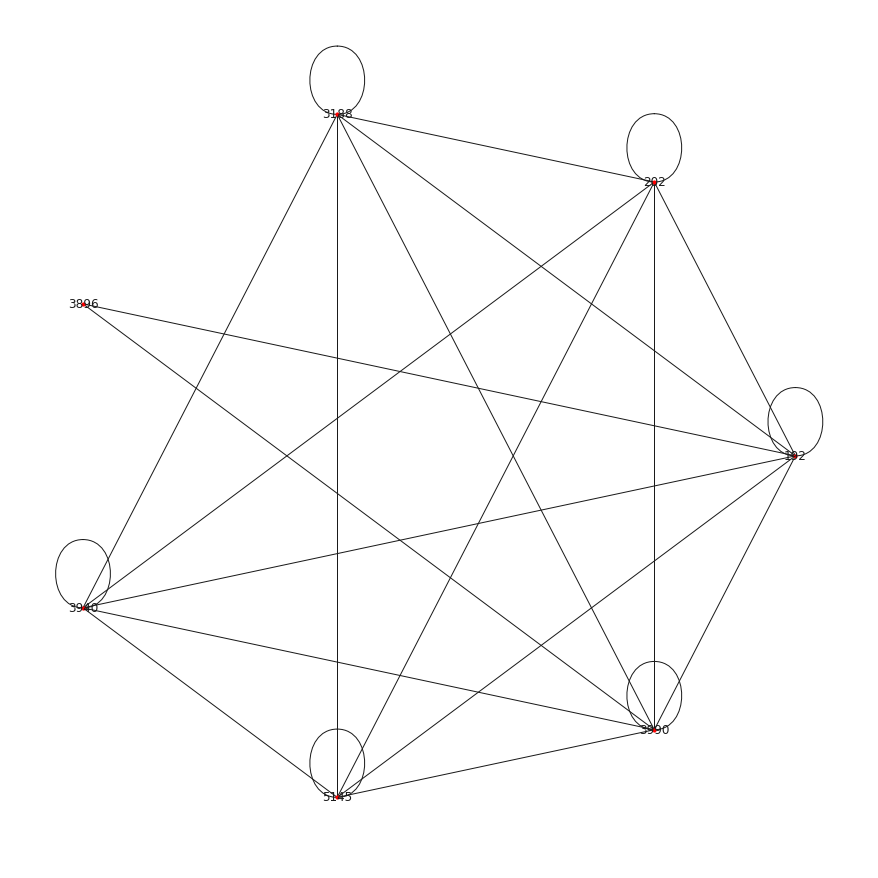

In [ ]:
#nx.draw_networkx(G1,node_size=10,node_color='red',with_labels=True)
plt.figure(figsize=(12,12))
nx.draw_circular(G1,node_size=10,node_color='red',with_labels=True)
plt.show()

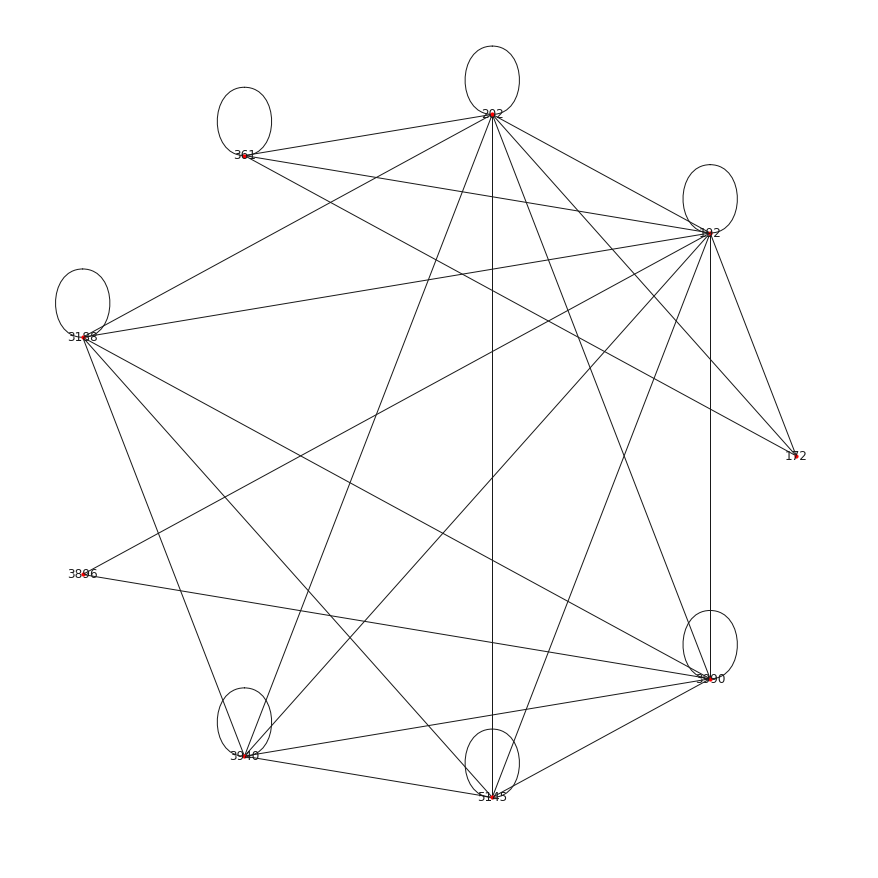

In [ ]:
# Now add the ceo skilling-j and ken-l to the relations
#
#   kenneth.lay@enron.com = 361
#   jeff.skilling@enron.com = 172


table2_persons = relations[(\
           (relations.From==3896) |\
           (relations.From==5145) |\
           (relations.From==3990) |\
           (relations.From==3940) |\
           (relations.From==3188) |\
           (relations.From==7005) |\
           (relations.From==192) |\
           (relations.From==202) |\
           (relations.From==361) |\
           (relations.From==172) )\
          &\
          ((relations.To_Cc==3896) |\
           (relations.To_Cc==5145) |\
           (relations.To_Cc==3990) |\
           (relations.To_Cc==3940) |\
           (relations.To_Cc==3188) |\
           (relations.To_Cc==7005) |\
           (relations.To_Cc==192) |\
           (relations.To_Cc==202) |\
           (relations.To_Cc==361) |\
           (relations.To_Cc==172)\
           )]

G2 = nx.from_pandas_edgelist(table2_persons, source='From', target='To_Cc')
plt.figure(figsize=(12,12))
nx.draw_circular(G2,node_size=10,node_color='red',with_labels=True,font_size=12)
plt.show()

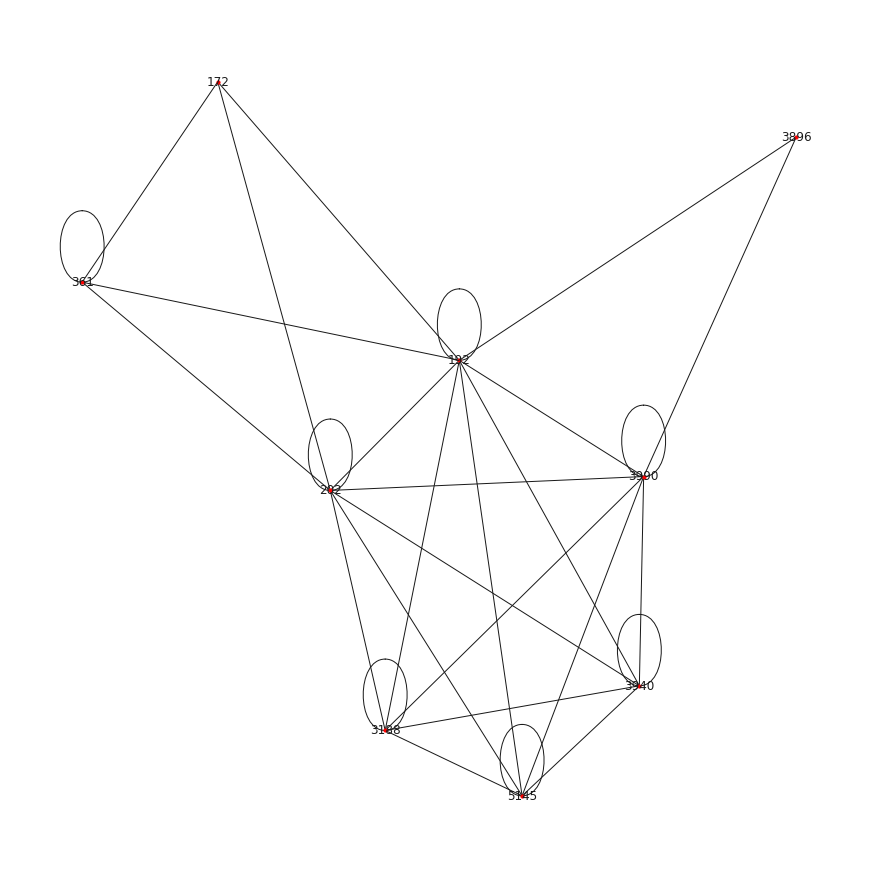

In [ ]:
plt.figure(figsize=(12,12))
nx.draw_spring(G2,node_size=10,node_color='red',with_labels=True,font_size=12)
plt.show()

In [ ]:
dict1 = nx.algorithms.centrality.degree_centrality(G2)
print("degree:",sorted(dict1, key=dict1.get,reverse=True))
dict1 = nx.algorithms.centrality.betweenness_centrality(G2)
print("betweenness",sorted(dict1, key=dict1.get,reverse=True))
dict1 = nx.algorithms.centrality.eigenvector_centrality(G2)
print("eigenvector",sorted(dict1, key=dict1.get,reverse=True))
dict1 = nx.algorithms.centrality.closeness_centrality(G2)
print("closeness",sorted(dict1, key=dict1.get,reverse=True))

degree: [192, 202, 3990, 3188, 3940, 5145, 361, 172, 3896]
betweenness [192, 202, 3990, 172, 361, 3188, 3896, 3940, 5145]
eigenvector [192, 202, 3990, 3188, 3940, 5145, 361, 172, 3896]
closeness [192, 202, 3990, 3188, 3940, 5145, 172, 361, 3896]


In [ ]:
# So who are Karen Denne en Steven Kene? Karen Denne was VP of public relations and Steven Kean was chief of staff